# Grid Search for K Value

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv("./gene_expression.csv")


In [3]:
X = df.drop("Cancer Present",axis=1)
y = df["Cancer Present"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()

In [5]:
knn = KNeighborsClassifier()

In [6]:
from sklearn.pipeline import Pipeline

In [7]:
oprations = [("scaler",scaler),
             ("knn",knn)]
pipe = Pipeline(oprations)

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [11]:
k_vales = list(range(1,25))
param_grid = {"knn__n_neighbors":k_vales}

In [12]:
cv_classfier =  GridSearchCV(pipe,param_grid,cv=5,scoring="accuracy")

In [13]:
cv_classfier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24]},
             scoring='accuracy')

In [15]:
cv_classfier.best_params_

{'knn__n_neighbors': 20}

## 最終模型

In [16]:
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=20)
oprations = [("scaler",scaler),
             ("knn",knn)]
pipe = Pipeline(oprations)
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=20))])

In [17]:
pipe_pred = pipe.predict(X_test)

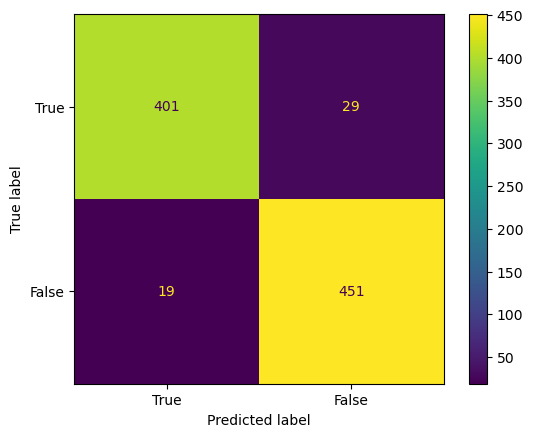

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,pipe_pred,labels=[1,0],
                                        display_labels=['True','False'])

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



## SVM

## gamma值的理解

- **gamma值越大**：
  - 模型會更加關注訓練數據中非常接近的資料點。
  - 因為模型更緊密地擬合這些局部數據，所以可能會導致過擬合（overfitting）。

- **gamma值越小**：
  - 模型會考慮更廣泛的資料範圍，訓練時更多地關注整體數據分佈。
  - 因此，模型更均勻地適應數據，但可能會導致欠擬合（underfitting），因為它忽略了數據中的一些細節。

這樣的表述能更清晰地傳達gamma值對模型的影響。

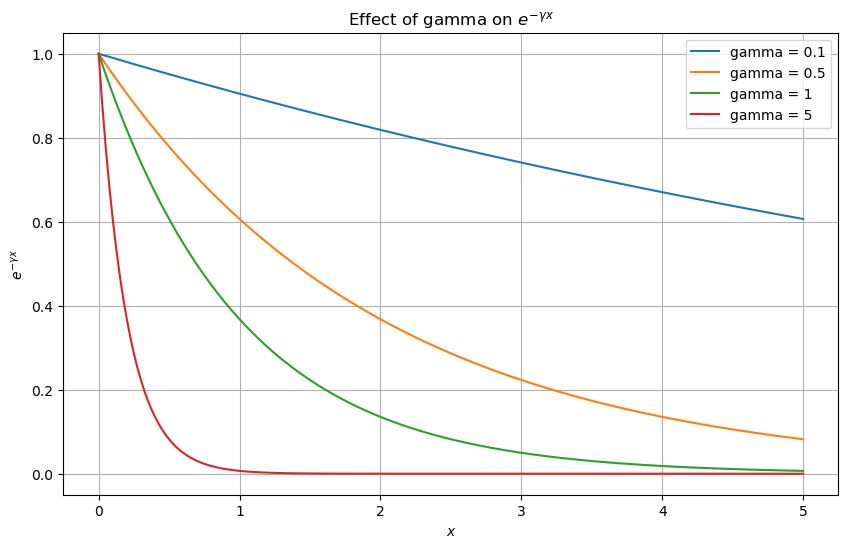

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 定義 gamma 值
gamma_values = [0.1, 0.5, 1, 5]

# 定義 x 值範圍
x = np.linspace(0, 5, 400)

# 創建圖形
plt.figure(figsize=(10, 6))

# 繪製不同 gamma 值對應的 e^(-gamma * x) 曲線
for gamma in gamma_values:
    y = np.exp(-gamma * x)
    plt.plot(x, y, label=f'gamma = {gamma}')

# 添加圖例和標籤
plt.title('Effect of gamma on $e^{-\gamma x}$')
plt.xlabel('$x$')
plt.ylabel('$e^{-\gamma x}$')
plt.legend()
plt.grid(True)

# 顯示圖形
plt.show()

# 探索支持向量機（Support Vector Machines, SVM）

**注意：在這個範例中，我們將探討算法，所以我們將跳過數據標準化和訓練/測試拆分，而是看看各種參數如何改變SVM（在分類中最容易視覺化效果）**

[關於SVM的優秀論文鏈接](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4448154647BC7B10C991CEF2236BBA38?doi=10.1.1.114.4288&rep=rep1&type=pdf)
* A tutorial on support vector regression by ALEX J. SMOLA and BERNHARD SCHOLKOPF

## SVM - 分類

### 簡介
支持向量機（Support Vector Machines，SVM）是一種監督學習模型，通常用於分類和回歸分析。SVM的目標是找到一個最佳的超平面來將數據點分開，這個超平面可以最大化邊界（即支持向量）。

### 參數
在探索SVM的過程中，有幾個重要的參數需要理解和調整：
1. **核函數（Kernel Function）**：核函數將低維空間的數據轉換到高維空間，使得數據在高維空間中更容易分離。常見的核函數包括線性核、多項式核和高斯徑向基核（RBF核）。

2. **C參數（正則化參數）**：C值控制的是誤分類的懲罰程度。較小的C值會產生一個更平滑的決策邊界，但可能會容忍更多的誤分類；較大的C值會努力正確分類所有訓練樣本，但可能導致過擬合。

3. **γ參數（gamma）**：γ參數適用於多項式核和RBF核。γ值決定了單個訓練樣本的影響範圍。較大的γ值會使得決策邊界更加複雜，較小的γ值會使得決策邊界更平滑。

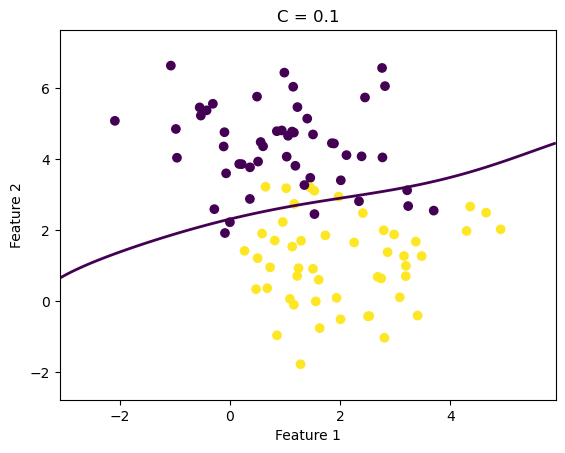

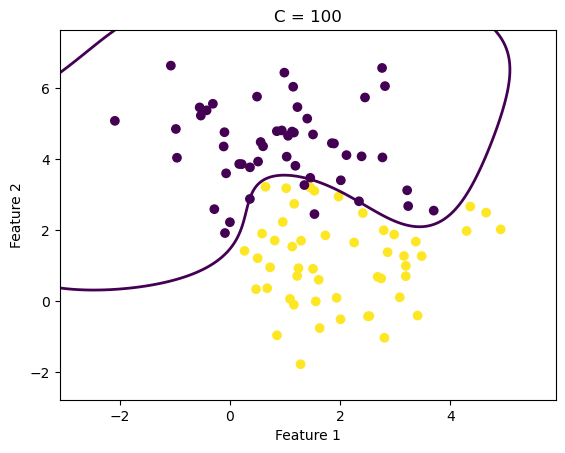

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

# Compare decision boundaries for small and large C values
for C in [0.1, 100]:
    clf = SVC(kernel='rbf', C=C, gamma='scale')
    clf.fit(X, y)
    
    # Create a mesh to plot decision boundary
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contour(xx, yy, Z, levels=[0], linewidths=2)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(f'C = {C}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


## 數據
這裡顯示的數據模擬了一項醫學研究，在該研究中，被病毒感染的小鼠被給予不同劑量的兩種藥物，然後在兩週後檢查它們是否仍然被感染。根據這些數據，我們的目標是創建一個分類模型，預測（給定兩個劑量測量值）小鼠是否仍然會被病毒感染。

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("./mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

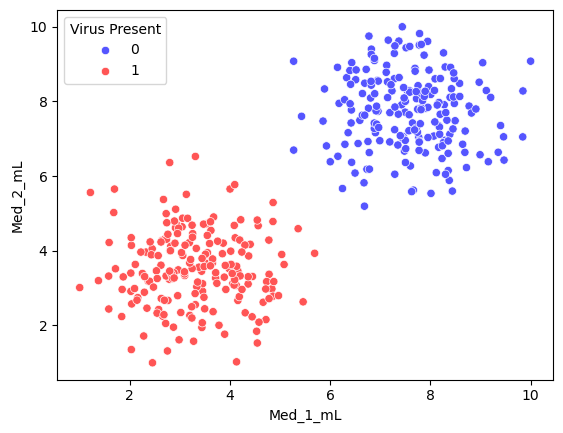

In [24]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic')

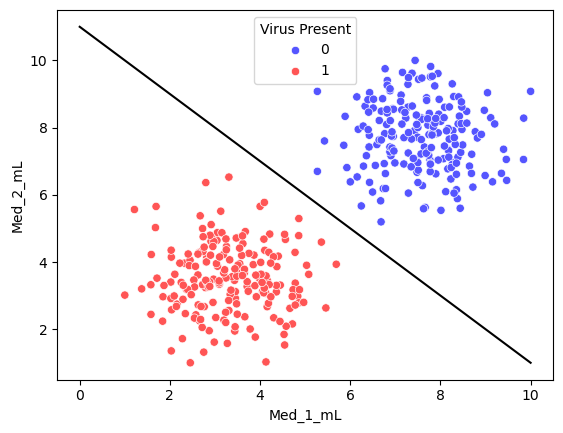

In [26]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)
x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

In [27]:
from sklearn.svm import SVC
y = df["Virus Present"]
X =  df.drop("Virus Present",axis=1)
model = SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


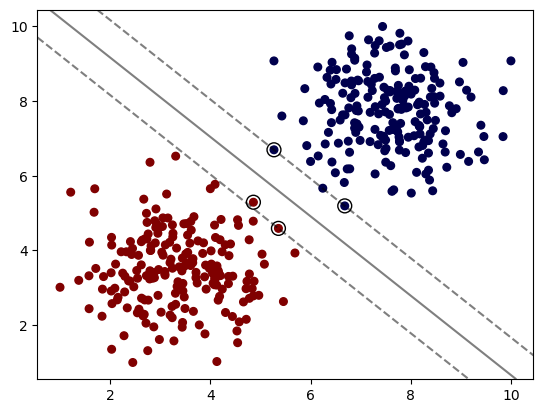

In [28]:
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(model,X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


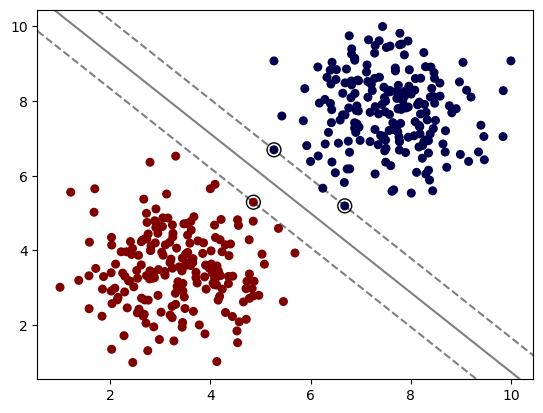

In [36]:
model = SVC(kernel='linear', C=10)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## 非線性分類

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


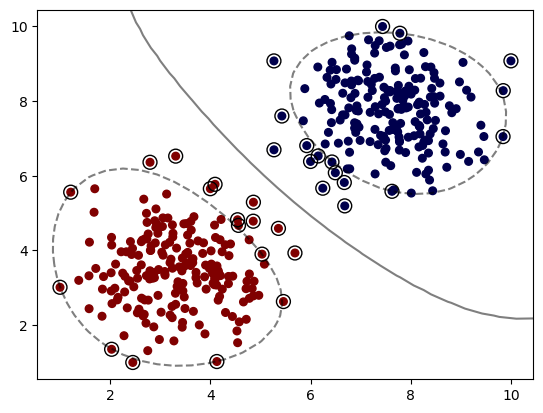

In [38]:
model = SVC(kernel='rbf', C=0.2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


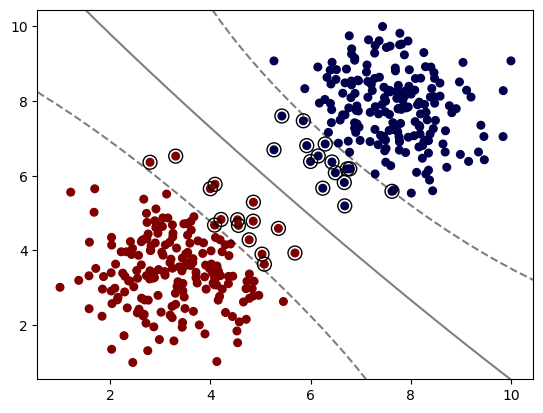

In [40]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


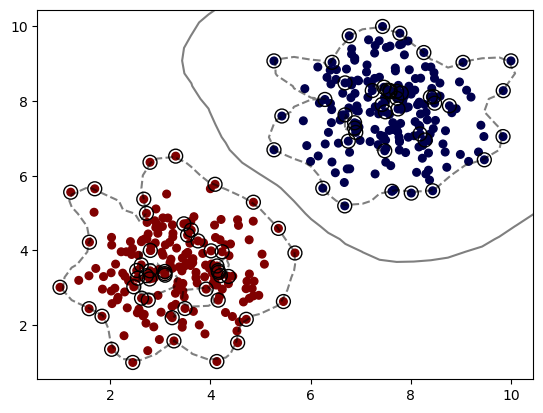

In [41]:
model = SVC(kernel='rbf', C=1,gamma=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## 網格搜索

In [43]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], "kernel":["linear","rbf"]}
grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)
grid.best_params_  

{'C': 0.01, 'kernel': 'linear'}

# Support Vector Machines
## SVM - Regression

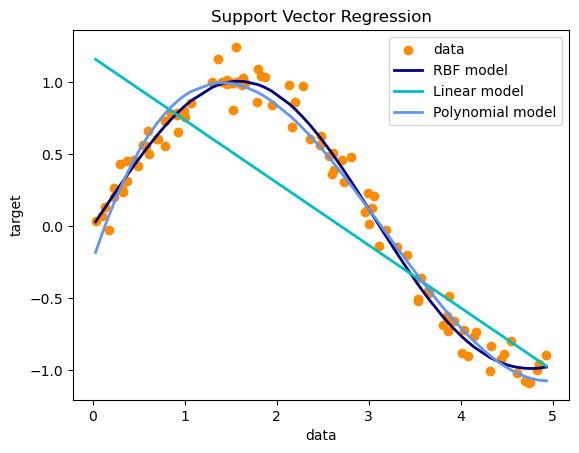

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# 生成示例數據
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(100) * 0.1

# 訓練 SVR 模型
#epsilon 就像是「容錯帶」的寬度，寬就大方向對就好，窄就連小差錯都不放過
#coef0 就像是在「核函數」裡加的基礎高度
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, epsilon=.1)
#poly 多項式核函數
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

# 擬合數據
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# 繪圖
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(X, y_lin, color='c', lw=2, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## CountVectorizer

在使用 CountVectorizer 時，
指定 stop_words='english' 會自動移除英文中的常見停用詞（stop words），
例如 "this" 和 "is"。停用詞是一些在文本分析中不具有區分度的常見單詞，例如冠詞、連詞和一些代詞。這些單詞通常對文本的主題或意圖沒有太大的貢獻，所以在計算特徵時會被移除。

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [51]:
cv = CountVectorizer(stop_words='english')#使用 CountVectorizer 計數詞頻：
#cv = CountVectorizer()

In [52]:
text = ['This is a line',

           "This is another line",
           
       "Completely different line"]
counts = cv.fit_transform(text)
counts.todense()

matrix([[0, 0, 1],
        [0, 0, 1],
        [1, 1, 1]], dtype=int64)

In [ ]:
cv.vocabulary_ 

{'line': 2, 'completely': 0, 'different': 1}

'completely' 對應索引 0

'different' 對應索引 1

'line' 對應索引 2


簡單來說，`TfidfTransformer` 就是一個「幫字詞打分數」的工具，它會把你原本的詞頻（也就是某個字在文件中出現了多少次）轉換成更有區別度的「TF–IDF 分數」。

1. **TF（Term Frequency，詞頻）**：衡量一個詞在一篇文件裡出現的頻率。出現越多，原始分數越高。
2. **IDF（Inverse Document Frequency，逆文件頻率）**：衡量一個詞在整個語料庫（所有文件）中有多「罕見」。如果一個詞在很多文件裡都出現（像「的」、「是」這種常見字），它的 IDF 會很低；只有少數文件裡才出現的詞（像「電腦視覺」、「隨機森林」）IDF 會比較高。

`TfidfTransformer` 會把這兩者「相乘」：

$$
\text{TF–IDF}(t, d) = \text{TF}(t, d) \times \log\frac{N}{\text{DF}(t)}
$$

* $t$ 是詞，$d$ 是文件
* $N$ 是文件總數，$\text{DF}(t)$ 是包含詞 $t$ 的文件數

**為什麼要這麼做？**

* 把在特定文件中很重要（頻繁出現），但在整體語料庫中又很少見的詞，打上高分。
* 把那些雖然在文件裡出現很多次，卻在所有文件裡都常見的詞，打上低分。

這樣一來，你在做後續機器學習或相似度比對時，就能更容易「抓到」那些真正能區分文件意義的關鍵字，而不是被高頻的「停用詞」干擾。


**舉例TF-IDF應用**

我會根據用戶問題提供一個實際的例子，用來解釋TF-IDF。這方面，我可以探討像是“蘋果手機”這類專有名詞，出現在某些文檔中頻繁卻重要性較高的詞彙；而“的”這類中文常見停用詞，雖然出現頻繁，但TF-IDF值會較低。為了更清楚，我可以展示一個小範例，通過簡單的數字來說明這些詞彙在TF-IDF計算中的表現。

**說明TF-IDF範例**

我可以舉兩個例子來區分“常出現但不重要”和“常出現但重要”的詞彙。“的”在所有文檔中都會出現，因此IDF很低，TF高，但TF-IDF低；而“蘋果手機”在第一篇文檔中出現兩次，其他文檔比較少，也因此TF和IDF都較高，因此TF-IDF較高。簡單來說，“蘋果手機”在特定文檔中出現頻繁且重要，而“的”雖然常見卻對於區分意圖的文檔來說沒有重要性。

**解釋TF-IDF範例**

“常出現但不重要”如“的”這樣的停用詞，通常在所有文檔中頻繁出現，IDF很低，因此TF-IDF並不高。而如“Quibli”，它在特定領域的文章中頻繁出現但在其他地方很少見，IDF則高，TF-IDF就會很高，顯示它對該文章很重要。另外，如果在不同運動領域的文章中，像“湖人”這樣的詞彙可能顯得很重要，若只在拳擊文章中出現，每篇都帶來高TF-IDF。


已思考 29 秒鐘


以下用一個簡單的「籃球賽報導」小語料庫舉例，說明兩類「常出現」的詞：

1. **常出現但不重要**（停用詞／泛用詞）
2. **常出現且重要**（能區分本文主題的關鍵詞）

---

## 語料庫（共 3 篇短文）

* **Doc1（湖人隊比賽）**

  > 「湖人 在 今晚 的比賽 中 以 102：98 戰勝 勇士，球員的表現 出色。」

* **Doc2（勇士隊新聞）**

  > 「勇士 球隊球員今季新秀的表現 穩定，但 在 防守 端 仍 有 改善 空間。」

* **Doc3（一般體育新聞）**

  > 「今年的體育 賽事 因 為 天候 的影響 而 延期，眾多 球迷 只能 在 電視 前 觀賽。」

設 $N=3$。計算幾個詞在 **Doc1** 中的 TF–IDF：

|  詞彙 | Doc1 中 TF | DF（出現過的文件數） | IDF = $\log\frac{N}{\text{DF}}$ |  TF–IDF = TF × IDF |         分類        |
| :-: | :-------: | :---------: | :-----------------------------: | :----------------: | :---------------: |
|  的  |     2     |      3      |       $\log\frac{3}{3}=0$       |    $2\times0=0$    |    常見停用詞 → 不重要    |
|  球員 |     1     |      2      |   $\log\frac{3}{2}\approx0.18$  | $1\times0.18=0.18$ | 常見詞，但多篇都有提 → 不太區分 |
|  湖人 |     1     |      1      |   $\log\frac{3}{1}\approx1.10$  | $1\times1.10=1.10$ |     本文主題 → 重要     |
|  戰勝 |     1     |      1      |   $\log\frac{3}{1}\approx1.10$  | $1\times1.10=1.10$ |     本文事件 → 重要     |

* **「的」**：停用詞，雖然在 Doc1 出現 2 次（TF 高），但因為在所有 3 篇都出現（DF=3），IDF=0，最終 TF–IDF=0 → 不重要。
* **「球員」**：在 Doc1 出現 1 次，但同時 Doc2 也提到（DF=2），IDF 約 0.18，所以 TF–IDF 也很低 → 雖「常出現」，卻不具辨別力。
* **「湖人」、「戰勝」**：都只在 Doc1 出現（DF=1），IDF≈1.10，TF–IDF≈1.10 → 不僅常出現，而且是報導的核心詞，分數高 → 重要。

---

### 小結

* **常出現但不重要**：像「的」、「球員」，即使在一篇文中頻繁出現，因為在多篇文都會出現，IDF 低、TF–IDF 低 → 適合視為停用或次要詞。
* **常出現且重要**：像「湖人」、「戰勝」，在目標文件中頻繁出現，但在整體語料庫中少見，IDF 高、TF–IDF 高 → 最能凸顯該文件獨特內容。

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("./airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [56]:
data = df[['airline_sentiment','text']]
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [57]:
y = df['airline_sentiment']
X = df['text']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [61]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [62]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)#由文字權重 推算情緒

MultinomialNB()

In [63]:
tes = tfidf.transform(["@SouthwestAir thanks! Very "])
preds = nb.predict(tes)
preds
print(X_test.iloc[0])
print(preds)

@SouthwestAir thanks! Very excited to see it :D
['positive']
